In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from patsy import dmatrices
import patsy.builtins
import scipy.stats 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from yellowbrick.regressor import CooksDistance , ResidualsPlot
%matplotlib inline

In [2]:
data = pd.read_csv("D:\\IPBA\\Statistical Modelling\\Linear Regression\\real_estate_sales.txt", header=None ,delimiter='\s+')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,360000,3032,4,4,1,2,0.0,1972,2,1,22221,0
1,2,340000,2058,4,2,1,2,0.0,1976,2,1,22912,0
2,3,250000,1780,4,3,1,2,0.0,1980,2,1,21345,0
3,4,205500,1638,4,2,1,2,0.0,1963,2,1,17342,0
4,5,275500,2196,4,3,1,2,0.0,1968,2,7,21786,0


In [3]:
data = data.iloc[: , 1:13]
print("Shape" + str(data.shape))
print("Data Types\n" + str(data.dtypes))

Shape(522, 12)
Data Types
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7     float64
8       int64
9       int64
10      int64
11      int64
12      int64
dtype: object


# Variables
1. Price of the property
2. Built up Area(sq feet)
3. No. of bedrooms
4. No. of bathrooms
5. Whether Air Conditioned or not (Binary)
6. No. of Cars that can be parked
7. Pool (Binary)
8. Year of Construction
9. Quality (categorical) (Low , Medium , high)
10. Architectural Style(Categorical)
11. Land Area
12. Highway proximity(Binary)

# Objective
Estimate Price depending upon the above variables

In [4]:
data.columns = ['Price','Built_Up_Area','Bedrooms','Bathrooms','Air_Conditioning','Garage_Size','Pool',
                'Year_Built','Quality','Style','Lot_Size','Highway']
data.head()

,Price,Built_Up_Area,Bedrooms,Bathrooms,Air_Conditioning,Garage_Size,Pool,Year_Built,Quality,Style,Lot_Size,Highway
0,360000,3032,4,4,1,2,0.0,1972,2,1,22221,0
1,340000,2058,4,2,1,2,0.0,1976,2,1,22912,0
2,250000,1780,4,3,1,2,0.0,1980,2,1,21345,0
3,205500,1638,4,2,1,2,0.0,1963,2,1,17342,0
4,275500,2196,4,3,1,2,0.0,1968,2,7,21786,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             522 non-null    int64  
 1   Built_Up_Area     522 non-null    int64  
 2   Bedrooms          522 non-null    int64  
 3   Bathrooms         522 non-null    int64  
 4   Air_Conditioning  522 non-null    int64  
 5   Garage_Size       522 non-null    int64  
 6   Pool              521 non-null    float64
 7   Year_Built        522 non-null    int64  
 8   Quality           522 non-null    int64  
 9   Style             522 non-null    int64  
 10  Lot_Size          522 non-null    int64  
 11  Highway           522 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 49.1 KB


In [6]:
#Check for NAN values
data.isnull().sum()

Price               0
Built_Up_Area       0
Bedrooms            0
Bathrooms           0
Air_Conditioning    0
Garage_Size         0
Pool                1
Year_Built          0
Quality             0
Style               0
Lot_Size            0
Highway             0
dtype: int64

In [7]:
data.loc[data['Pool'].isnull()]

,Price,Built_Up_Area,Bedrooms,Bathrooms,Air_Conditioning,Garage_Size,Pool,Year_Built,Quality,Style,Lot_Size,Highway
389,171000,1512,2,1,0,1,NaN,1956,3,1,14774,0


In [8]:
#Since it is just one data point , dropping the row
data.drop(389 , axis=0 , inplace=True)

In [9]:
data.head(390)

,Price,Built_Up_Area,Bedrooms,Bathrooms,Air_Conditioning,Garage_Size,Pool,Year_Built,Quality,Style,Lot_Size,Highway
0,360000,3032,4,4,1,2,0.0,1972,2,1,22221,0
1,340000,2058,4,2,1,2,0.0,1976,2,1,22912,0
2,250000,1780,4,3,1,2,0.0,1980,2,1,21345,0
3,205500,1638,4,2,1,2,0.0,1963,2,1,17342,0
4,275500,2196,4,3,1,2,0.0,1968,2,7,21786,0
...,...,...,...,...,...,...,...,...,...,...,...,...
385,169900,1708,3,1,0,1,0.0,1950,3,1,11413,0
386,189500,1700,4,2,0,2,0.0,1953,3,1,14023,0
387,195000,1742,1,1,1,2,0.0,1961,3,1,18250,0
388,215000,1890,4,2,1,2,0.0,1961,3,1,22110,0


In [10]:
#verifying the NAN values now
data.isnull().sum()

Price               0
Built_Up_Area       0
Bedrooms            0
Bathrooms           0
Air_Conditioning    0
Garage_Size         0
Pool                0
Year_Built          0
Quality             0
Style               0
Lot_Size            0
Highway             0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 0 to 521
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             521 non-null    int64  
 1   Built_Up_Area     521 non-null    int64  
 2   Bedrooms          521 non-null    int64  
 3   Bathrooms         521 non-null    int64  
 4   Air_Conditioning  521 non-null    int64  
 5   Garage_Size       521 non-null    int64  
 6   Pool              521 non-null    float64
 7   Year_Built        521 non-null    int64  
 8   Quality           521 non-null    int64  
 9   Style             521 non-null    int64  
 10  Lot_Size          521 non-null    int64  
 11  Highway           521 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 52.9 KB


In [12]:
#Summary Statistics
data.describe()

,Price,Built_Up_Area,Bedrooms,Bathrooms,Air_Conditioning,Garage_Size,Pool,Year_Built,Quality,Style,Lot_Size,Highway
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,278099.318618,2265.902111,3.474088,2.658349,0.833013,2.101727,0.069098,1966.925144,2.182342,3.349328,24388.122841,0.021113
std,137976.193603,712.784143,1.013277,1.085912,0.373322,0.652817,0.253864,17.648386,0.641029,2.563209,11687.717623,0.143900
min,84000.000000,980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1885.000000,1.000000,1.000000,4560.000000,0.000000
25%,180000.000000,1704.000000,3.000000,2.000000,1.000000,2.000000,0.000000,1956.000000,2.000000,1.000000,17342.000000,0.000000
50%,229900.000000,2062.000000,3.000000,3.000000,1.000000,2.000000,0.000000,1966.000000,2.000000,2.000000,22204.000000,0.000000
75%,335000.000000,2654.000000,4.000000,3.000000,1.000000,2.000000,0.000000,1981.000000,3.000000,7.000000,26790.000000,0.000000
max,920000.000000,5032.000000,7.000000,8.000000,1.000000,7.000000,1.000000,1998.000000,3.000000,11.000000,86830.000000,1.000000


<font size=4>Checking the relationship between the predictors and the target. <br>
Analyzing individual variable and cleaning the data as per the requirement</font>

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Built_Up_Area', ylabel='Price'>,
        <AxesSubplot:xlabel='Garage_Size', ylabel='Price'>,
        <AxesSubplot:xlabel='Year_Built', ylabel='Price'>,
        <AxesSubplot:xlabel='Lot_Size', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='Built_Up_Area'>,
        <AxesSubplot:xlabel='Built_Up_Area', ylabel='Built_Up_Area'>,
        <AxesSubplot:xlabel='Garage_Size', ylabel='Built_Up_Area'>,
        <AxesSubplot:xlabel='Year_Built', ylabel='Built_Up_Area'>,
        <AxesSubplot:xlabel='Lot_Size', ylabel='Built_Up_Area'>],
       [<AxesSubplot:xlabel='Price', ylabel='Garage_Size'>,
        <AxesSubplot:xlabel='Built_Up_Area', ylabel='Garage_Size'>,
        <AxesSubplot:xlabel='Garage_Size', ylabel='Garage_Size'>,
        <AxesSubplot:xlabel='Year_Built', ylabel='Garage_Size'>,
        <AxesSubplot:xlabel='Lot_Size', ylabel='Garage_Size'>],
       [<AxesSubplot:xlabel='Price', ylabel='Year_B

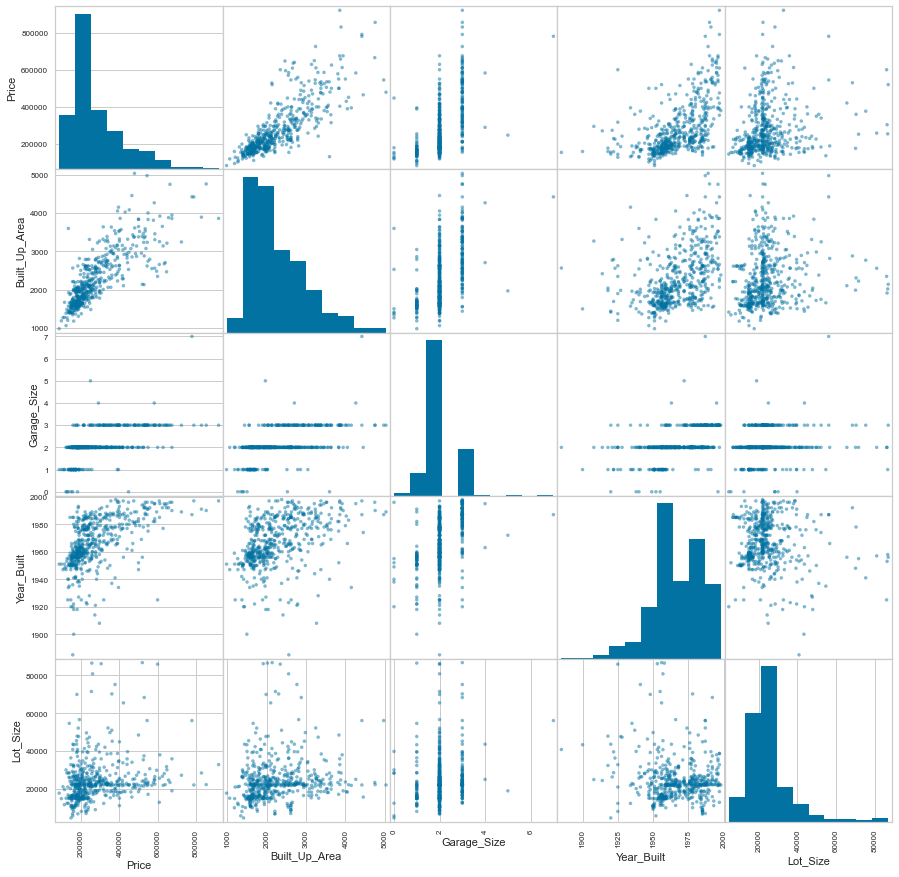

In [13]:
X = ['Price','Built_Up_Area','Garage_Size',
                'Year_Built','Lot_Size']
scatter_matrix(data[X] ,figsize = (15,15))


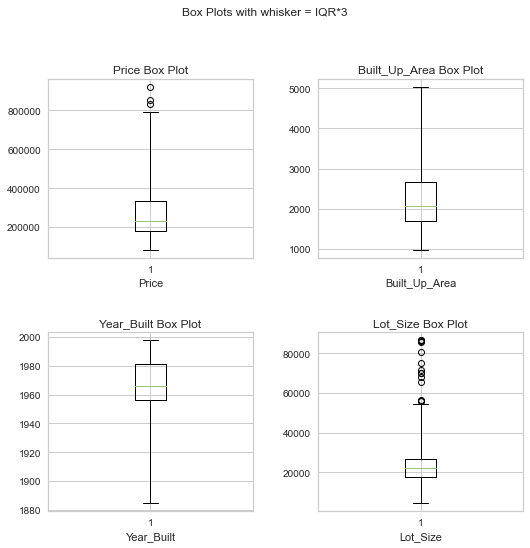

In [14]:
l = ['Price' , 'Built_Up_Area' , 'Year_Built' , 'Lot_Size']
fig = plt.figure(figsize=(8,8))
for i in range(1,len(l)+1):
    plt.subplot(2,2,i)
    plt.boxplot(data[l[i-1]] , whis = 3)
    plt.xlabel(l[i-1])
    plt.title(l[i-1]+' Box Plot')
plt.suptitle('Box Plots with whisker = IQR*3')
fig.tight_layout(pad=3.0)

In [15]:
#Correltaion
corr = data.corr()
corr

,Price,Built_Up_Area,Bedrooms,Bathrooms,Air_Conditioning,Garage_Size,Pool,Year_Built,Quality,Style,Lot_Size,Highway
Price,1.000000,0.811472,0.412235,0.655645,0.286815,0.577184,0.146301,0.555120,-0.757800,0.356623,0.223218,-0.051217
Built_Up_Area,0.811472,1.000000,0.542045,0.751686,0.252289,0.513666,0.160154,0.431236,-0.686168,0.609646,0.157569,-0.061626
Bedrooms,0.412235,0.542045,1.000000,0.538978,0.230018,0.313611,0.134065,0.267608,-0.376119,0.378890,0.124581,-0.029213
Bathrooms,0.655645,0.751686,0.538978,1.000000,0.285934,0.437045,0.176486,0.482528,-0.650721,0.469940,0.146113,-0.052203
Air_Conditioning,0.286815,0.252289,0.230018,0.285934,1.000000,0.314451,0.101690,0.425123,-0.410926,0.127397,-0.109399,-0.041638
Garage_Size,0.577184,0.513666,0.313611,0.437045,0.314451,1.000000,0.108355,0.461186,-0.545314,0.232710,0.150069,-0.002436
Pool,0.146301,0.160154,0.134065,0.176486,0.101690,0.108355,1.000000,0.059532,-0.124841,0.081048,-0.037307,-0.040012
Year_Built,0.555120,0.431236,0.267608,0.482528,0.425123,0.461186,0.059532,1.000000,-0.617201,0.233245,-0.101531,0.025612
Quality,-0.757800,-0.686168,-0.376119,-0.650721,-0.410926,-0.545314,-0.124841,-0.617201,1.000000,-0.346657,-0.114300,0.020728
Style,0.356623,0.609646,0.378890,0.469940,0.127397,0.232710,0.081048,0.233245,-0.346657,1.000000,-0.014582,-0.119096


<AxesSubplot:>

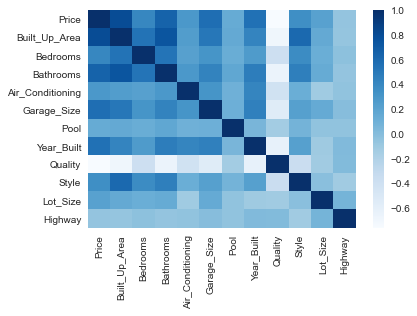

In [16]:
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values , cmap='Blues')

<font size = 8>Fitting the Model</font><br>
<br>
<font size=4> This is an iterative process. Starting by using all the variables and then checking the assumptions</font>

In [17]:
mod1 = smf.ols('Price~Built_Up_Area+Bedrooms+Bathrooms+Air_Conditioning+Garage_Size+Year_Built+Quality+Lot_Size+Style', data=data)
reg1 = mod1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     205.3
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          1.91e-163
Time:                        21:09:17   Log-Likelihood:                -6506.3
No. Observations:                 521   AIC:                         1.303e+04
Df Residuals:                     511   BIC:                         1.308e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -2.38e+06    4.4e+05     -5.408      0.000   -3.24e+06   -1.52e+06
Built_Up_Area      126.3418      7.766     16.269      0.000     111.085     141.599
Bedrooms         -5321.6701   3478.489     -1.530      0.127   -1.22e+04    1512.230
Bathrooms        -3153.4583   4330.167     -0.728      0.467   -1.17e+04    5353.662
Air_Conditioning -1.071e+04   8785.241     -1.219      0.224    -2.8e+04    6552.971
Garage_Size       1.795e+04   5534.761      3.244      0.001    7080.492    2.88e+04
Year_Built        1263.9099    221.631      5.703      0.000     828.490    1699.330
Quality          -5.348e+04   7442.044     -7.186      0.000   -6.81e+04   -3.89e+04
Lot_Size             1.1656      0.261      4.467      0.000       0.653       1.678
Style            -8251.2010   1434.460     -5.752      0.000   -1.11e+04   -5433.036
==============================================================================
Omnibus:                       62.008   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.283
Skew:                           0.628   Prob(JB):                     6.32e-33
Kurtosis:                       5.292   Cond. No.                     4.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#Handling Categorical Variables
data = data.iloc[: , :12]
data = data.astype({'Quality': 'category',
              'Style': 'category'})
data.dtypes

Price                  int64
Built_Up_Area          int64
Bedrooms               int64
Bathrooms              int64
Air_Conditioning       int64
Garage_Size            int64
Pool                 float64
Year_Built             int64
Quality             category
Style               category
Lot_Size               int64
Highway                int64
dtype: object

In [19]:
mod1 = smf.ols('Price~Built_Up_Area+Bedrooms+Bathrooms+Air_Conditioning+Garage_Size+Year_Built+Quality+Lot_Size+Style', data=data)
reg1 = mod1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     132.5
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          2.14e-177
Time:                        21:09:18   Log-Likelihood:                -6449.1
No. Observations:                 521   AIC:                         1.294e+04
Df Residuals:                     502   BIC:                         1.302e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.631e+06   4.11e+05     -6.404      0.000   -3.44e+06   -1.82e+06
Quality[T.2]      -1.38e+05   1.06e+04    -12.958      0.000   -1.59e+05   -1.17e+05
Quality[T.3]     -1.538e+05   1.43e+04    -10.756      0.000   -1.82e+05   -1.26e+05
Style[T.2]       -2.603e+04   9315.462     -2.794      0.005   -4.43e+04   -7724.641
Style[T.3]       -1.276e+04   8873.613     -1.438      0.151   -3.02e+04    4671.866
Style[T.4]        1.637e+04   1.85e+04      0.887      0.376   -1.99e+04    5.26e+04
Style[T.5]       -2.024e+04   1.51e+04     -1.337      0.182      -5e+04    9494.320
Style[T.6]         490.8432   1.52e+04      0.032      0.974   -2.93e+04    3.03e+04
Style[T.7]       -3.606e+04   8648.897     -4.169      0.000    -5.3e+04   -1.91e+04
Style[T.9]       -8.637e+04   5.93e+04     -1.455      0.146   -2.03e+05    3.02e+04
Style[T.10]       -6.93e+04   5.99e+04     -1.158      0.248   -1.87e+05    4.83e+04
Style[T.11]       -9.51e+04   5.93e+04     -1.604      0.109   -2.12e+05    2.14e+04
Built_Up_Area       95.8303      7.710     12.430      0.000      80.683     110.977
Bedrooms          -986.0178   3232.531     -0.305      0.760   -7336.974    5364.938
Bathrooms         4050.6555   3990.457      1.015      0.311   -3789.399    1.19e+04
Air_Conditioning  5075.4713   8136.102      0.624      0.533   -1.09e+04    2.11e+04
Garage_Size        1.29e+04   5044.035      2.557      0.011    2986.534    2.28e+04
Year_Built        1403.3822    208.626      6.727      0.000     993.494    1813.270
Lot_Size             1.3173      0.239      5.521      0.000       0.849       1.786
==============================================================================
Omnibus:                       57.029   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.097
Skew:                           0.403   Prob(JB):                     8.01e-50
Kurtosis:                       6.125   Cond. No.                     4.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
residuals1 = reg1.resid
prd1 = reg1.predict()

<AxesSubplot:ylabel='Price'>

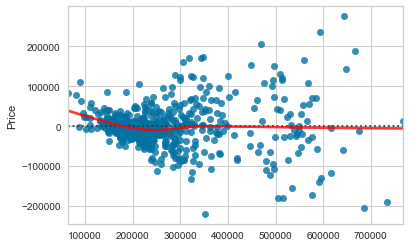

In [21]:
#Linearity
sns.residplot(x=prd1 , y='Price' , data=data , lowess=True , line_kws={'color':'red','alpha':0.8})

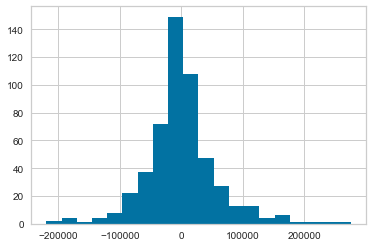

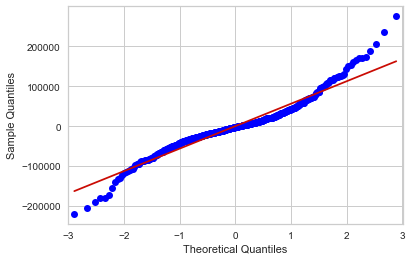

In [22]:
#Normality
plt.hist(residuals1 , bins=20)
sm.qqplot(residuals1 , line='r')
plt.show()

Text(0.5, 1.0, 'Scale-Location')

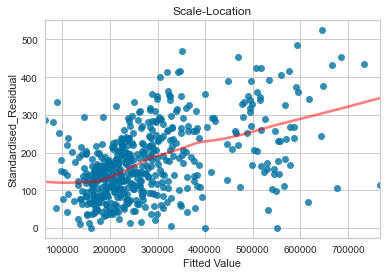

In [23]:
#Constant Variance
std_res1 = np.sqrt(np.abs(residuals1))
sns.regplot(x=prd1 , y=std_res1 , lowess = True , line_kws={'color':'red' , 'alpha':0.5})
plt.xlabel('Fitted Value')
plt.ylabel('Standardised_Residual')
plt.title('Scale-Location')

Text(0, 0.5, 'Predicted')

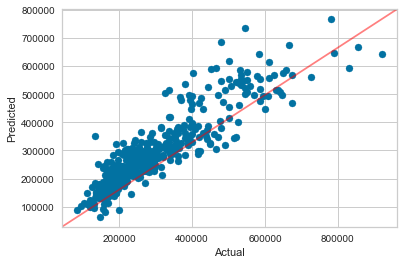

In [24]:
#Acutal vs Predicted
plt.scatter(data['Price'] , prd1)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim ,color='red' , alpha=0.5)
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [25]:
Y,X = dmatrices('Price~Built_Up_Area+Bedrooms+Bathrooms+Air_Conditioning+Garage_Size+Year_Built+Quality+Lot_Size+Style', data=data ,return_type='dataframe')
df = pd.DataFrame()
df['vif'] = [variance_inflation_factor(X.values , i) for i in range(len(X.columns))]
df['features'] = X.columns
df

,vif,features
0,25626.300368,Intercept
1,4.249561,Quality[T.2]
2,6.672494,Quality[T.3]
3,1.304012,Style[T.2]
4,1.288728,Style[T.3]
5,1.070240,Style[T.4]
6,1.160484,Style[T.5]
7,1.164223,Style[T.6]
8,2.191720,Style[T.7]
9,1.024647,Style[T.9]


<font size=4> VIF is less than 5 for almost all the vairables , hence no significant multicollinearity</font>

In [26]:
#MSE
mse = mean_squared_error(data['Price'] , prd1)
rmse = np.sqrt(mse)
rmse

57488.65302924545

<font size=4>All the assumptions seem to be satisfied apart from the constant variance of the residuals</font>

<font size=4> For dealing with non constant variance , using boxcox transformation. This will return the fitted value of <br>
    price and the lambda value which maximizes the log likelihood.</font>

In [27]:
p , l  = scipy.stats.boxcox(data['Price'])
l

-0.6020974868035425

(array([  2.,   1.,   7.,  36., 105., 113.,  98.,  77.,  57.,  25.]),
 array([1.65905993, 1.65919738, 1.65933484, 1.65947229, 1.65960975,
        1.6597472 , 1.65988466, 1.66002211, 1.66015956, 1.66029702,
        1.66043447]),
 <BarContainer object of 10 artists>)

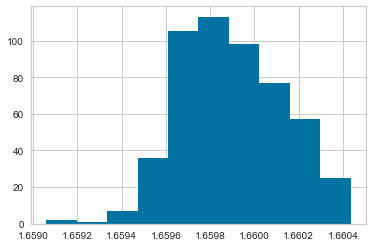

In [28]:
plt.hist(p)

<font size=4>Fitting the model with new price value</font>

In [29]:
mod2 = smf.ols('p~Built_Up_Area+Bedrooms+Bathrooms+Air_Conditioning+Garage_Size+Year_Built+Quality+Lot_Size+Style', data=data)
reg2 = mod2.fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     121.2
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          1.54e-169
Time:                        21:09:19   Log-Likelihood:                 4056.7
No. Observations:                 521   AIC:                            -8075.
Df Residuals:                     502   BIC:                            -7994.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6551      0.001   2304.757      0.000       1.654       1.657
Quality[T.2]        -0.0001   1.86e-05     -5.526      0.000      -0.000   -6.63e-05
Quality[T.3]        -0.0002    2.5e-05     -7.582      0.000      -0.000      -0.000
Style[T.2]       -2.804e-05   1.63e-05     -1.722      0.086      -6e-05    3.96e-06
Style[T.3]        6.648e-06   1.55e-05      0.428      0.668   -2.38e-05    3.71e-05
Style[T.4]        4.585e-05   3.23e-05      1.420      0.156   -1.76e-05       0.000
Style[T.5]        7.764e-06   2.65e-05      0.293      0.769   -4.42e-05    5.98e-05
Style[T.6]        4.193e-05   2.65e-05      1.582      0.114   -1.01e-05     9.4e-05
Style[T.7]       -2.801e-05   1.51e-05     -1.852      0.065   -5.77e-05     1.7e-06
Style[T.9]        2.965e-05      0.000      0.286      0.775      -0.000       0.000
Style[T.10]         -0.0001      0.000     -1.075      0.283      -0.000    9.31e-05
Style[T.11]         -0.0002      0.000     -2.043      0.042      -0.000   -8.12e-06
Built_Up_Area     1.348e-07   1.35e-08     10.003      0.000    1.08e-07    1.61e-07
Bedrooms          1.475e-05   5.65e-06      2.609      0.009    3.64e-06    2.58e-05
Bathrooms         1.591e-05   6.98e-06      2.281      0.023    2.21e-06    2.96e-05
Air_Conditioning  4.855e-05   1.42e-05      3.413      0.001    2.06e-05    7.65e-05
Garage_Size       3.029e-05   8.82e-06      3.435      0.001     1.3e-05    4.76e-05
Year_Built        2.204e-06   3.65e-07      6.042      0.000    1.49e-06    2.92e-06
Lot_Size          2.741e-09   4.17e-10      6.570      0.000    1.92e-09    3.56e-09
==============================================================================
Omnibus:                       32.487   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.836
Skew:                          -0.458   Prob(JB):                     9.14e-12
Kurtosis:                       4.226   Cond. No.                     4.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
residuals2 = reg2.resid
prd2 = reg2.predict()

<font size = 4>Checking the assumptions</font>

<AxesSubplot:ylabel='Price'>

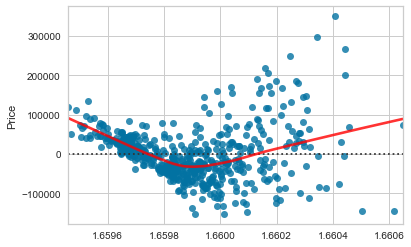

In [31]:
#Linearity
sns.residplot(x=prd2 , y='Price' , data=data , lowess=True , line_kws={'color':'red','alpha':0.8})

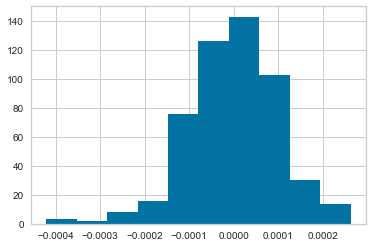

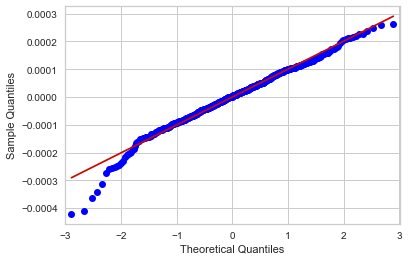

In [32]:
plt.hist(residuals2)
sm.qqplot(residuals2 , line='s')
plt.show()

Text(0.5, 1.0, 'Scale-Location')

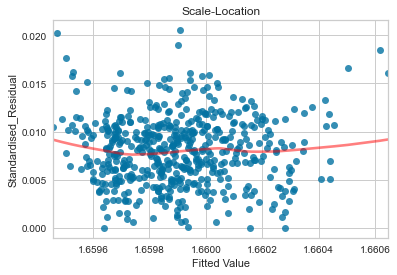

In [33]:
#Constant Variance
std_res2 = np.sqrt(np.abs(residuals2))
sns.regplot(x=prd2 , y=std_res2 , lowess = True , line_kws={'color':'red' , 'alpha':0.5})
plt.xlabel('Fitted Value')
plt.ylabel('Standardised_Residual')
plt.title('Scale-Location')

Text(0, 0.5, 'Predicted')

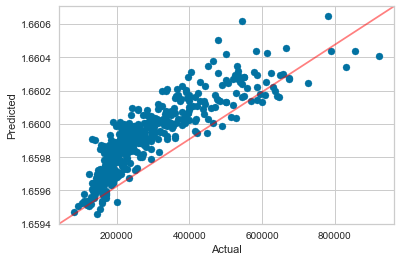

In [34]:
#Acutal vs Predicted
plt.scatter(data['Price'] , prd2)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim ,color='red' , alpha=0.5)
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [35]:
y,x = dmatrices('p~Built_Up_Area+Bedrooms+Bathrooms+Air_Conditioning+Garage_Size+Year_Built+Quality+Lot_Size+Style', data=data , return_type='dataframe')

In [36]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values , i )for i in range(x.shape[1])]
vif['Features'] = x.columns

In [37]:
vif

,VIF,Features
0,25626.300368,Intercept
1,4.249561,Quality[T.2]
2,6.672494,Quality[T.3]
3,1.304012,Style[T.2]
4,1.288728,Style[T.3]
5,1.070240,Style[T.4]
6,1.160484,Style[T.5]
7,1.164223,Style[T.6]
8,2.191720,Style[T.7]
9,1.024647,Style[T.9]


In [38]:
#MSE
mse = mean_squared_error(data['Price'] , prd2)
rmse = np.sqrt(mse)
rmse

310385.5627480561

(array([510.,   7.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.00996041, 0.10896437, 0.20796832, 0.30697228, 0.40597624,
        0.5049802 , 0.60398416, 0.70298812, 0.80199208, 0.90099604,
        1.        ]),
 <BarContainer object of 10 artists>)

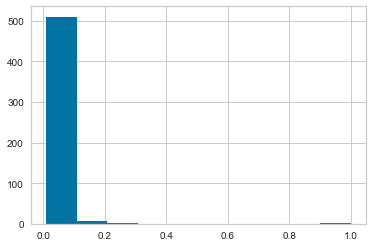

In [39]:
#X-outliers
inf = reg2.get_influence()
lev = inf.hat_matrix_diag
plt.hist(lev)

In [40]:
lev_li = []
for le in lev : 
    if le > 0.8:
        i = np.where(lev == le)
        lev_li.append(i)
lev_li

[(array([69], dtype=int64),),
 (array([75], dtype=int64),),
 (array([383], dtype=int64),)]

<font size=4>There seem to be 3 outliers in x</font>

(array([ 1.,  0.,  1.,  0.,  1.,  1.,  1.,  2.,  2.,  4.,  4.,  4.,  6.,
        18., 26., 36., 39., 56., 49., 61., 53., 34., 40., 37., 17., 12.,
         2.,  9.,  3.,  2.]),
 array([-4.71876789e+00, -4.47053972e+00, -4.22231155e+00, -3.97408338e+00,
        -3.72585521e+00, -3.47762704e+00, -3.22939887e+00, -2.98117071e+00,
        -2.73294254e+00, -2.48471437e+00, -2.23648620e+00, -1.98825803e+00,
        -1.74002986e+00, -1.49180169e+00, -1.24357352e+00, -9.95345355e-01,
        -7.47117187e-01, -4.98889018e-01, -2.50660849e-01, -2.43268032e-03,
         2.45795488e-01,  4.94023657e-01,  7.42251826e-01,  9.90479995e-01,
         1.23870816e+00,  1.48693633e+00,  1.73516450e+00,  1.98339267e+00,
         2.23162084e+00,  2.47984901e+00,  2.72807718e+00]),
 <BarContainer object of 30 artists>)

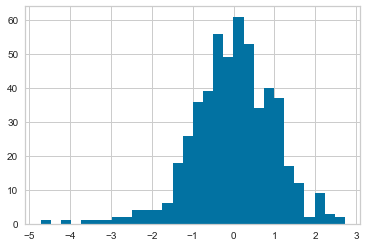

In [41]:
#Y-outliers
standardized_resid = inf.resid_studentized_internal
plt.hist(standardized_resid ,bins=30)

In [42]:
res_li = []
for re in standardized_resid  : 
    if np.abs(re) > 3.5:
        i = np.where(standardized_resid == re)
        res_li.append(i)
res_li

[(array([23], dtype=int64),),
 (array([53], dtype=int64),),
 (array([459], dtype=int64),)]

<font size=4>There seem to be 3 outliers in Y</font>

<font size = 4>Finding influential value using Cook's distance</font>

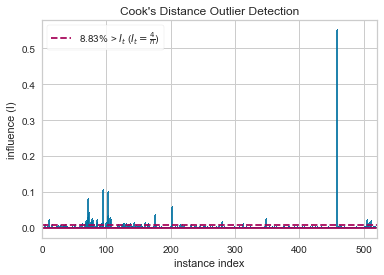

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [43]:
X=data[['Built_Up_Area','Bedrooms','Bathrooms','Air_Conditioning','Garage_Size',
                'Year_Built','Quality','Style','Lot_Size']].astype('float')
y = data['Price']
visualiser = CooksDistance()
visualiser.fit(X,y)
visualiser.show()

In [44]:
#There seems to be one influential value
np.where(visualiser.distance_ > 0.2)

(array([459], dtype=int64),)

In [45]:
data.drop(459 , axis=0 ,inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 521
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             520 non-null    int64   
 1   Built_Up_Area     520 non-null    int64   
 2   Bedrooms          520 non-null    int64   
 3   Bathrooms         520 non-null    int64   
 4   Air_Conditioning  520 non-null    int64   
 5   Garage_Size       520 non-null    int64   
 6   Pool              520 non-null    float64 
 7   Year_Built        520 non-null    int64   
 8   Quality           520 non-null    category
 9   Style             520 non-null    category
 10  Lot_Size          520 non-null    int64   
 11  Highway           520 non-null    int64   
dtypes: category(2), float64(1), int64(9)
memory usage: 46.2 KB


<font size=4>Fitting the model again</font>

In [47]:
pr ,la  = scipy.stats.boxcox(data['Price'])
la

-0.6005276468919851

(array([  2.,   1.,   7.,  36., 105., 113.,  97.,  77.,  57.,  25.]),
 array([1.66336446, 1.66350458, 1.66364471, 1.66378483, 1.66392496,
        1.66406508, 1.66420521, 1.66434533, 1.66448546, 1.66462558,
        1.66476571]),
 <BarContainer object of 10 artists>)

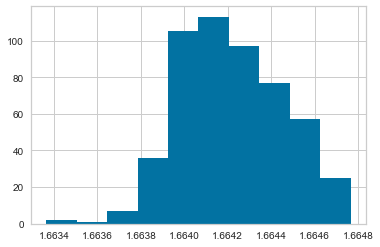

In [48]:
plt.hist(pr)

In [49]:
mod3 = smf.ols('pr~Built_Up_Area+Bedrooms+Bathrooms+Air_Conditioning+Garage_Size+Year_Built+Quality+Lot_Size+Style', data=data)
reg3 = mod3.fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pr   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     121.5
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          1.61e-169
Time:                        21:09:22   Log-Likelihood:                 4039.1
No. Observations:                 520   AIC:                            -8040.
Df Residuals:                     501   BIC:                            -7959.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6593      0.001   2267.230      0.000       1.658       1.661
Quality[T.2]        -0.0001    1.9e-05     -5.550      0.000      -0.000    -6.8e-05
Quality[T.3]        -0.0002   2.55e-05     -7.634      0.000      -0.000      -0.000
Style[T.2]       -2.809e-05   1.66e-05     -1.691      0.091   -6.07e-05    4.54e-06
Style[T.3]          7.2e-06   1.58e-05      0.455      0.649   -2.39e-05    3.83e-05
Style[T.4]        4.749e-05   3.29e-05      1.443      0.150   -1.72e-05       0.000
Style[T.5]        8.556e-06    2.7e-05      0.317      0.751   -4.44e-05    6.15e-05
Style[T.6]        4.359e-05    2.7e-05      1.613      0.107   -9.49e-06    9.67e-05
Style[T.7]       -2.802e-05   1.54e-05     -1.817      0.070   -5.83e-05    2.28e-06
Style[T.9]        2.994e-05      0.000      0.283      0.777      -0.000       0.000
Style[T.10]         -0.0001      0.000     -1.064      0.288      -0.000     9.6e-05
Style[T.11]         -0.0002      0.000     -2.050      0.041      -0.000   -8.99e-06
Built_Up_Area     1.375e-07   1.37e-08     10.012      0.000    1.11e-07    1.65e-07
Bedrooms          1.466e-05   5.77e-06      2.542      0.011    3.33e-06     2.6e-05
Bathrooms          1.62e-05   7.11e-06      2.279      0.023    2.24e-06    3.02e-05
Air_Conditioning  4.874e-05   1.45e-05      3.359      0.001    2.02e-05    7.72e-05
Garage_Size       3.072e-05   8.99e-06      3.417      0.001    1.31e-05    4.84e-05
Year_Built        2.253e-06   3.72e-07      6.060      0.000    1.52e-06    2.98e-06
Lot_Size          2.808e-09   4.25e-10      6.603      0.000    1.97e-09    3.64e-09
==============================================================================
Omnibus:                       32.490   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.062
Skew:                          -0.457   Prob(JB):                     8.17e-12
Kurtosis:                       4.233   Cond. No.                     4.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
residuals3 = reg3.resid
prd3 = reg3.predict()

<AxesSubplot:ylabel='Price'>

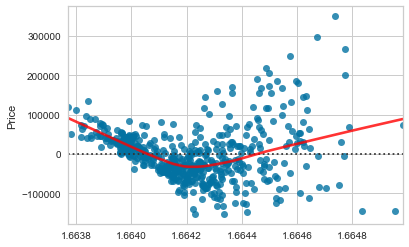

In [51]:
#Linearity
sns.residplot(x=prd3 , y='Price' , data=data , lowess=True , line_kws={'color':'red','alpha':0.8})

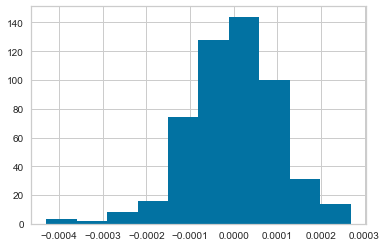

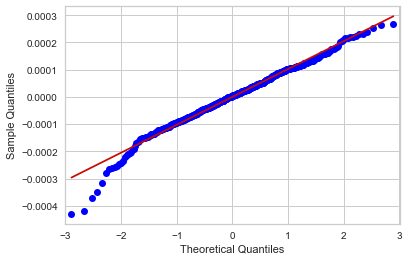

In [52]:
plt.hist(residuals3)
sm.qqplot(residuals3 , line='s')
plt.show()

Text(0.5, 1.0, 'Scale-Location')

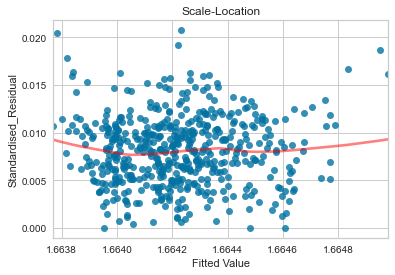

In [53]:
#Constant Variance
std_res3 = np.sqrt(np.abs(residuals3))
sns.regplot(x=prd3 , y=std_res3 , lowess = True , line_kws={'color':'red' , 'alpha':0.5})
plt.xlabel('Fitted Value')
plt.ylabel('Standardised_Residual')
plt.title('Scale-Location')

In [54]:
y,x = dmatrices('pr~Built_Up_Area+Bedrooms+Bathrooms+Air_Conditioning+Garage_Size+Pool+Year_Built+Quality+Style+Lot_Size+Highway', data=data , return_type='dataframe')

In [55]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values , i )for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF,Features
0,25909.942639,Intercept
1,4.241776,Quality[T.2]
2,6.657510,Quality[T.3]
3,1.324603,Style[T.2]
4,1.294614,Style[T.3]
5,1.072548,Style[T.4]
6,1.166966,Style[T.5]
7,1.168145,Style[T.6]
8,2.210097,Style[T.7]
9,1.024946,Style[T.9]
